# Chapter 8 : Vapour Power Systems

* Michael J . Mora. Fundamentals of Engineering Thermodynamics(7th Edition). John Wiley & Sons, Inc. 2011


## Example 8.1:Analyzing an Ideal Rankine Cycle Page 438

Steam is the working fluid in an ideal Rankine cycle. 

Saturated vapor enters the turbine at 8.0 MPa and saturated liquid exits the condenser at a pressure of 0.008 MPa. 

The net power output of the cycle is 100 MW.

<img src="./vps-fig81.png"/> 


* **Process 1–2:** **Isentropic expansion** of the working fluid through the turbine from saturated vapor at state 1 to the condenser pressure.
* **Process 2–3:** Heat transfer from the working fluid as it flows at **constant pressure**
through the condenser with saturated liquid at state 3.
* **Process 3–4:** **Isentropic compression** in the pump to state 4 in the compressed liquid region.
* **Process 4–1:** Heat transfer to the working fluid as it flows at **constant pressure** through the boiler to complete the cycle.


Determine for the cycle

(a) the thermal efficiency,

(b) the back work ratio, 

(c) the mass flow rate of the steam,in kg/h,

(d) the rate of heat transfer, Qin, into the working fluid as it passes through the boiler, in MW,

(e) the rate of heat transfer, Qout, from the condensing steam as it passes through the condenser, in MW,

(f) the mass flow rate of the condenser cooling water, in kg/h, if cooling water enters the condenser at 15C and exits at 35C.


### Engineering Model:

* 1 Each component of the cycle is analyzed as a control volume at steady state. The control volumes are shown on the accompanying sketch by dashed lines.
* 2 All processes of the working fluid are internally reversible.
* 3 The turbine and pump operate adiabatically.
* 4 Kinetic and potential energy effects are negligible.
* 5 Saturated vapor enters the turbine. Condensate exits the condenser as saturated liquid.

## Analysis:

To begin the analysis, we fix each of **the principal states（1，2，3，4)** located on the accompanying schematic and **T–s** diagrams.

In [1]:
from seuif97 import *

# Given:-
p1 = 8.0               #  in MPa
p3 = 0.008             # pressure of saturated liquid exiting the condenser in MPa
Wcycledot = 100.00     # the net power output of the cycle in MW

# Analysis

# State  1
h1=px2h(p1,1)          # h1 = 2758.0    From table A-3  kj/kg
s1=px2s(p1,1)          # s1 = 5.7432    From table A-3  kj/kg.k

# State  2
s2 = s1

# quality at state 2
sf=px2s(p3,0)         # sf = 0.5926   kj/kg.k
sg=px2s(p3,1)         # sg = 8.2287   kj/kg.k
x2=(s2-sf)/(sg-sf)

hf=px2h(p3,0)         # hf = 173.88    kj/kg
hg=px2h(p3,1)         
h2 = hf + x2*(hg-hf)      #  hfg = 2403.1   kj/kg

# State 3 is saturated liquid at 0.008 MPa, so
h3 = hf                                         #  kj/kg
v3 =px2v(p3,0)                #1.0084e-3  m^3/kg

#State 4 
p4 = p1
h4 = h3 + v3*(p4-p3)*10**6*10**-3    # kj/kg

### (a) The thermal efficiency

The net power developed by the cycle is

$\dot{W}_{cycle}=\dot{W}_t-\dot{W}_p$

Mass and energy rate balances for control volumes around the turbine and pump give,respectively

$\frac{\dot{W}_t}{\dot{m}}=h_1-h_2$  
$\frac{\dot{W}_p}{\dot{m}}=h_4-h_3$

where $\dot{m}$ is the mass flow rate of the steam. The rate of heat transfer to the working fluid as it passes through the boiler is determined using mass and energy rate balances as

$\frac{\dot{Q}_{in}}{\dot{m}}=h_1-h_4$

The thermal efficiency is then


$\eta=\frac{\dot{W}_t-\dot{W}_p}{\dot{Q}_{in}}=\frac{(h_1-h_2)-(h_4-h_3)}{h_1-h_4}$


In [2]:
# Part(a)
# Mass and energy rate balances for control volumes 
# around the turbine and pump give, respectively

# turbine
wtdot = h1 - h2
# pump
wpdot = h4-h3

# The rate of heat transfer to the working fluid as it passes 
# through the boiler is determined using mass and energy rate balances as
qindot = h1-h4

# thermal efficiency
eta = (wtdot-wpdot)/qindot   

# Result for part a
print('(a) The thermal efficiency for the cycle is ',round(eta,3))

(a) The thermal efficiency for the cycle is  0.371


In [3]:
# Part(b)
# back work ratio：bwr, defined as the ratio of the pump work input to the work 
# developed by the turbine.
bwr = wpdot/wtdot                                    # 

# Result
print('(b) The back work ratio is ',round(bwr,3)*100,'%')

# Part(c)
mdot = (Wcycledot*10**3*3600)/((h1-h2)-(h4-h3))       # mass flow rate in kg/h

# Result 
print('(c) The mass flow rate of the steam is',round(mdot,2),'kg/h.')
 
# Part(d)
Qindot = mdot*qindot/(3600*10**3)                     # in MW

# Results
print('(d) The rate of heat transfer,Qindot , into the working fluid as \
      it passes through the boiler, is',round(Qindot,2),'MW.')

# Part(e)
Qoutdot = mdot*(h2-h3)/(3600*10**3)                   # in MW

# Results
print('(e) The rate of heat transfer,Qoutdot from the condensing steam as \
      it passes through the condenser, is',round(Qoutdot,2),'MW.')

# Part(f)
# Given: 
tcwin=15
tcwout=35

hcwout=tx2h(tcwout,0)   # From table A-2,hcwout= 146.68  kj/kg  

hcwin= tx2h(tcwin,0)    # hcwin 62.99  
mcwdot= (Qoutdot*10**3*3600)/(hcwout-hcwin)          # in kg/h

# Results
print('(f) The mass flow rate of the condenser cooling water is',round(mcwdot,2),'kg/h.')

(b) The back work ratio is  0.8 %
(c) The mass flow rate of the steam is 376776.21 kg/h.
(d) The rate of heat transfer,Qindot , into the working fluid as       it passes through the boiler, is 269.68 MW.
(e) The rate of heat transfer,Qoutdot from the condensing steam as       it passes through the condenser, is 169.68 MW.
(f) The mass flow rate of the condenser cooling water is 7301347.42 kg/h.


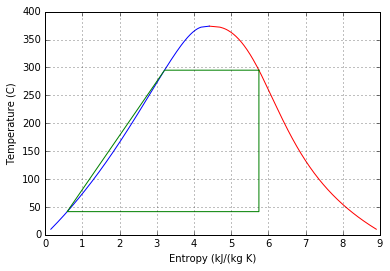

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

# saturated vapor and liquid entropy lines 
npt = np.linspace(10,647.096-273.15,200) # range of temperatures
svap = [s for s in [tx2s(t, 1) for t in npt]]
sliq = [s for s in [tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'r-')
plt.plot(sliq, npt, 'b-')

# Rankine T-S
t1=px2t(p1,1)
t2=px2t(p3,0)

t3=t2
s3=tx2s(t3,0)

s4=s3
t4=ps2t(p4,s4) 

t5=px2t(p1,0)
s5=px2s(p1,0)

tt=[t1,t2,t3,t4,t5,t1] 
ss=[s1,s2,s3,s4,s5,s1]

plt.plot(ss, tt, 'g-')

plt.xlabel('Entropy (kJ/(kg K)')
plt.ylabel('Temperature (C)')
plt.grid()
plt.show()